싸이트: https://sdc-james.gitbook.io/onebook/4.-and/5.1./5.1.3.-mnist-dataset

In [65]:
import warnings
warnings.filterwarnings(action='ignore')

In [66]:
from tensorflow.keras.datasets import mnist # mnist 데이터 셋
import tensorflow.keras.utils as utils # 원 핫인코딩
import pandas as pd                    # 원 핫인코딩
from tensorflow.keras.models import Sequential # 모델 생성
from tensorflow.keras.layers import Dense # model.add해서 layer쌓을때
from matplotlib import pyplot as plt # 학습과정의 los, acc 볼때
import numpy as np
np.random.seed(3)

In [67]:
# 1. 데이터 셋 준비하기
# 훈련셋, 테스트셋 분리
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [68]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [69]:
print(X_train[0].shape)
for row in X_train[0]:
    for pixel in row:
        print("{:3d} ".format(pixel), end='')
    print()

(28, 28)
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0

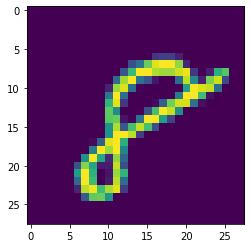

In [71]:
plt.imshow(X_train[59999])

In [72]:
Y_train[59999]

8

In [8]:
# 훈련셋(6만개)에서 훈련셋(5만개)과 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]


In [9]:
# 훈련셋(학습할 때 사용), 검증셋(학습할 때 사용), 훈련셋(평가할 때)
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((50000, 28, 28),
 (50000,),
 (10000, 28, 28),
 (10000,),
 (10000, 28, 28),
 (10000,))

In [10]:
# 정수 -> 실수형 변환 -> normalize하기(255으로 나눠)
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

In [11]:
X_train[0].shape, X_val.shape, X_test.shape

((784,), (10000, 784), (10000, 784))

In [12]:
# 훈련셋과 검증셋 -> 700개, 300개씩 가져옴(random하게)
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]

X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

In [13]:
X_train.shape, Y_val.shape, X_val.shape, Y_val.shape

((700, 784), (300,), (300, 784), (300,))

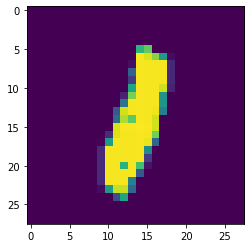

In [14]:
plt.imshow(X_train[0].reshape(28,28))

In [15]:
Y_train[0]

1

In [16]:
Y_train.shape, Y_val.shape, Y_test.shape

((700,), (300,), (10000,))

In [17]:
# 원핫이코딩 방법1
sampledata = np.array([1,2,3])
pd.get_dummies(sampledata).values

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=uint8)

In [18]:
# 원핫인코딩 방법2
utils.to_categorical(sampledata)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [19]:
# 원핫인코딩 = 라벨링 전환
# 1-> 0100000000
# 9-> 0000000001
Y_train = utils.to_categorical(Y_train, 10)
Y_val = utils.to_categorical(Y_val, 10)
Y_test = utils.to_categorical(Y_test, 10)

In [20]:
Y_train.shape

(700, 10)

In [21]:
Y_train.shape, Y_val.shape, Y_test.shape

((700, 10), (300, 10), (10000, 10))

In [22]:
print(Y_train[0])
print(Y_train[0].argmax())
# 귀찮은 데이터 전처리 끝

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1


In [23]:
# 2. 모델 구성하기
#import tensorflow.keras.layers import Activation
#relue = Activation('relu')
model = Sequential()
model.add(Dense(units=2, input_dim=784, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 학습과정 서정
model.compile(loss ='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=100, validation_data=(X_val, Y_val))


Epoch 1/1000
7/7 [==============================] - 0s 21ms/step - loss: 2.3100 - accuracy: 0.1000 - val_loss: 2.2882 - val_accuracy: 0.0967
Epoch 2/1000
7/7 [==============================] - 0s 3ms/step - loss: 2.2969 - accuracy: 0.1129 - val_loss: 2.2828 - val_accuracy: 0.1233
Epoch 3/1000
7/7 [==============================] - 0s 3ms/step - loss: 2.2877 - accuracy: 0.1243 - val_loss: 2.2762 - val_accuracy: 0.1300
Epoch 4/1000
7/7 [==============================] - 0s 3ms/step - loss: 2.2792 - accuracy: 0.1286 - val_loss: 2.2691 - val_accuracy: 0.1133
Epoch 5/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.2700 - accuracy: 0.1314 - val_loss: 2.2612 - val_accuracy: 0.1033
Epoch 6/1000
7/7 [==============================] - 0s 4ms/step - loss: 2.2617 - accuracy: 0.1329 - val_loss: 2.2542 - val_accuracy: 0.1167
Epoch 7/1000
7/7 [==============================] - 0s 3ms/step - loss: 2.2530 - accuracy: 0.1286 - val_loss: 2.2474 - val_accuracy: 0.1133
Epoch 8/1000
7/7 [=

Epoch 116/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.8051 - accuracy: 0.3186 - val_loss: 1.8827 - val_accuracy: 0.2567
Epoch 117/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.8031 - accuracy: 0.3171 - val_loss: 1.8810 - val_accuracy: 0.2567
Epoch 118/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.8008 - accuracy: 0.3200 - val_loss: 1.8792 - val_accuracy: 0.2600
Epoch 119/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.7988 - accuracy: 0.3186 - val_loss: 1.8776 - val_accuracy: 0.2600
Epoch 120/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.7972 - accuracy: 0.3229 - val_loss: 1.8759 - val_accuracy: 0.2600
Epoch 121/1000
7/7 [==============================] - ETA: 0s - loss: 1.6706 - accuracy: 0.38 - 0s 3ms/step - loss: 1.7948 - accuracy: 0.3229 - val_loss: 1.8741 - val_accuracy: 0.2600
Epoch 122/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.7928 - accuracy: 0.3243 - val_

Epoch 173/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.7004 - accuracy: 0.3543 - val_loss: 1.7923 - val_accuracy: 0.2933
Epoch 174/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.6988 - accuracy: 0.3543 - val_loss: 1.7909 - val_accuracy: 0.2967
Epoch 175/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.6971 - accuracy: 0.3557 - val_loss: 1.7894 - val_accuracy: 0.2967
Epoch 176/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.6954 - accuracy: 0.3586 - val_loss: 1.7879 - val_accuracy: 0.2967
Epoch 177/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.6936 - accuracy: 0.3586 - val_loss: 1.7865 - val_accuracy: 0.3000
Epoch 178/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.6920 - accuracy: 0.3614 - val_loss: 1.7850 - val_accuracy: 0.3000
Epoch 179/1000
7/7 [==============================] - ETA: 0s - loss: 1.7691 - accuracy: 0.33 - 0s 3ms/step - loss: 1.6904 - accuracy: 0.3600 - val_

7/7 [==============================] - 0s 4ms/step - loss: 1.6145 - accuracy: 0.3814 - val_loss: 1.7194 - val_accuracy: 0.3167
Epoch 231/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.6129 - accuracy: 0.3829 - val_loss: 1.7184 - val_accuracy: 0.3167
Epoch 232/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.6116 - accuracy: 0.3814 - val_loss: 1.7173 - val_accuracy: 0.3167
Epoch 233/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.6103 - accuracy: 0.3871 - val_loss: 1.7165 - val_accuracy: 0.3167
Epoch 234/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.6093 - accuracy: 0.3843 - val_loss: 1.7155 - val_accuracy: 0.3167
Epoch 235/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.6079 - accuracy: 0.3829 - val_loss: 1.7143 - val_accuracy: 0.3167
Epoch 236/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.6064 - accuracy: 0.3857 - val_loss: 1.7132 - val_accuracy: 0.3200
Epoch 237/1000
7/7 [=

7/7 [==============================] - 0s 3ms/step - loss: 1.4878 - accuracy: 0.4043 - val_loss: 1.6231 - val_accuracy: 0.3333
Epoch 344/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.4870 - accuracy: 0.4043 - val_loss: 1.6227 - val_accuracy: 0.3333
Epoch 345/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.4861 - accuracy: 0.4043 - val_loss: 1.6222 - val_accuracy: 0.3333
Epoch 346/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.4855 - accuracy: 0.4057 - val_loss: 1.6220 - val_accuracy: 0.3333
Epoch 347/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.4844 - accuracy: 0.4057 - val_loss: 1.6212 - val_accuracy: 0.3333
Epoch 348/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.4833 - accuracy: 0.4043 - val_loss: 1.6203 - val_accuracy: 0.3333
Epoch 349/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.4828 - accuracy: 0.4071 - val_loss: 1.6196 - val_accuracy: 0.3333
Epoch 350/1000
7/7 [=

7/7 [==============================] - 0s 3ms/step - loss: 1.4044 - accuracy: 0.4343 - val_loss: 1.5590 - val_accuracy: 0.3400
Epoch 458/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.4037 - accuracy: 0.4371 - val_loss: 1.5586 - val_accuracy: 0.3400
Epoch 459/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.4031 - accuracy: 0.4386 - val_loss: 1.5583 - val_accuracy: 0.3367
Epoch 460/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.4025 - accuracy: 0.4371 - val_loss: 1.5581 - val_accuracy: 0.3367
Epoch 461/1000
7/7 [==============================] - 0s 4ms/step - loss: 1.4020 - accuracy: 0.4357 - val_loss: 1.5574 - val_accuracy: 0.3400
Epoch 462/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.4011 - accuracy: 0.4386 - val_loss: 1.5570 - val_accuracy: 0.3433
Epoch 463/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.4004 - accuracy: 0.4343 - val_loss: 1.5563 - val_accuracy: 0.3433
Epoch 464/1000
7/7 [=

Epoch 571/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.3426 - accuracy: 0.4571 - val_loss: 1.5190 - val_accuracy: 0.3500
Epoch 572/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.3421 - accuracy: 0.4557 - val_loss: 1.5186 - val_accuracy: 0.3500
Epoch 573/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.3416 - accuracy: 0.4586 - val_loss: 1.5187 - val_accuracy: 0.3500
Epoch 574/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.3409 - accuracy: 0.4557 - val_loss: 1.5183 - val_accuracy: 0.3500
Epoch 575/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.3405 - accuracy: 0.4571 - val_loss: 1.5183 - val_accuracy: 0.3500
Epoch 576/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.3401 - accuracy: 0.4543 - val_loss: 1.5174 - val_accuracy: 0.3500
Epoch 577/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.3396 - accuracy: 0.4586 - val_loss: 1.5174 - val_accuracy: 0.3500
Epoch 

7/7 [==============================] - 0s 3ms/step - loss: 1.2943 - accuracy: 0.4714 - val_loss: 1.4939 - val_accuracy: 0.3767
Epoch 685/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2940 - accuracy: 0.4729 - val_loss: 1.4936 - val_accuracy: 0.3800
Epoch 686/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2935 - accuracy: 0.4729 - val_loss: 1.4931 - val_accuracy: 0.3800
Epoch 687/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2929 - accuracy: 0.4700 - val_loss: 1.4933 - val_accuracy: 0.3867
Epoch 688/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2927 - accuracy: 0.4743 - val_loss: 1.4931 - val_accuracy: 0.3867
Epoch 689/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2923 - accuracy: 0.4729 - val_loss: 1.4924 - val_accuracy: 0.3833
Epoch 690/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2922 - accuracy: 0.4657 - val_loss: 1.4922 - val_accuracy: 0.3833
Epoch 691/1000
7/7 [=

Epoch 741/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2729 - accuracy: 0.4786 - val_loss: 1.4837 - val_accuracy: 0.3933
Epoch 742/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2726 - accuracy: 0.4771 - val_loss: 1.4836 - val_accuracy: 0.3933
Epoch 743/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2721 - accuracy: 0.4757 - val_loss: 1.4831 - val_accuracy: 0.3933
Epoch 744/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2719 - accuracy: 0.4771 - val_loss: 1.4829 - val_accuracy: 0.3900
Epoch 745/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2715 - accuracy: 0.4771 - val_loss: 1.4831 - val_accuracy: 0.3933
Epoch 746/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2710 - accuracy: 0.4786 - val_loss: 1.4823 - val_accuracy: 0.3933
Epoch 747/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2706 - accuracy: 0.4771 - val_loss: 1.4821 - val_accuracy: 0.3933
Epoch 

7/7 [==============================] - 0s 3ms/step - loss: 1.2336 - accuracy: 0.4900 - val_loss: 1.4668 - val_accuracy: 0.4133
Epoch 855/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2333 - accuracy: 0.4914 - val_loss: 1.4668 - val_accuracy: 0.4133
Epoch 856/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2330 - accuracy: 0.4914 - val_loss: 1.4670 - val_accuracy: 0.4133
Epoch 857/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2329 - accuracy: 0.4914 - val_loss: 1.4663 - val_accuracy: 0.4133
Epoch 858/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2324 - accuracy: 0.4943 - val_loss: 1.4665 - val_accuracy: 0.4133
Epoch 859/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2321 - accuracy: 0.4914 - val_loss: 1.4665 - val_accuracy: 0.4133
Epoch 860/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.2319 - accuracy: 0.4857 - val_loss: 1.4664 - val_accuracy: 0.4133
Epoch 861/1000
7/7 [=

Epoch 967/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1970 - accuracy: 0.5129 - val_loss: 1.4502 - val_accuracy: 0.4267
Epoch 968/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1970 - accuracy: 0.5100 - val_loss: 1.4501 - val_accuracy: 0.4267
Epoch 969/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1967 - accuracy: 0.5100 - val_loss: 1.4496 - val_accuracy: 0.4333
Epoch 970/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1959 - accuracy: 0.5171 - val_loss: 1.4497 - val_accuracy: 0.4267
Epoch 971/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1955 - accuracy: 0.5129 - val_loss: 1.4498 - val_accuracy: 0.4333
Epoch 972/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1954 - accuracy: 0.5129 - val_loss: 1.4495 - val_accuracy: 0.4300
Epoch 973/1000
7/7 [==============================] - 0s 3ms/step - loss: 1.1950 - accuracy: 0.5129 - val_loss: 1.4498 - val_accuracy: 0.4267
Epoch 

In [44]:
# 1. 데이터 셋 준비하기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 훈련셋(6만개)에서 훈련셋(5만개)과 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# 정수 -> 실수형 변환 -> normalize하기(255으로 나눠)
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
# 훈련셋과 검증셋 -> 700개, 300개씩 가져옴(random하게)
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]

X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]
# 원핫인코딩 = 라벨링 전환
Y_train = utils.to_categorical(Y_train, 10)
Y_val = utils.to_categorical(Y_val, 10)
Y_test = utils.to_categorical(Y_test, 10)

# 2. 모델 구성하기
#import tensorflow.keras.layers import Activation
#relue = Activation('relu')
model = Sequential()
model.add(Dense(units=2, input_dim=784, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 학습과정 서정
model.compile(loss ='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs=1200, batch_size=100, validation_data=(X_val, Y_val))




Epoch 1/1200
7/7 [==============================] - 0s 20ms/step - loss: 2.2974 - accuracy: 0.1200 - val_loss: 2.3060 - val_accuracy: 0.1067
Epoch 2/1200
7/7 [==============================] - 0s 3ms/step - loss: 2.2926 - accuracy: 0.1243 - val_loss: 2.3017 - val_accuracy: 0.1167
Epoch 3/1200
7/7 [==============================] - 0s 3ms/step - loss: 2.2891 - accuracy: 0.1257 - val_loss: 2.2981 - val_accuracy: 0.1233
Epoch 4/1200
7/7 [==============================] - 0s 3ms/step - loss: 2.2860 - accuracy: 0.1300 - val_loss: 2.2949 - val_accuracy: 0.1400
Epoch 5/1200
7/7 [==============================] - 0s 3ms/step - loss: 2.2829 - accuracy: 0.1314 - val_loss: 2.2920 - val_accuracy: 0.1400
Epoch 6/1200
7/7 [==============================] - 0s 4ms/step - loss: 2.2799 - accuracy: 0.1400 - val_loss: 2.2894 - val_accuracy: 0.1400
Epoch 7/1200
7/7 [==============================] - 0s 4ms/step - loss: 2.2768 - accuracy: 0.1429 - val_loss: 2.2865 - val_accuracy: 0.1400
Epoch 8/1200
7/7 [=

Epoch 115/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.8901 - accuracy: 0.3057 - val_loss: 1.9082 - val_accuracy: 0.2933
Epoch 116/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.8871 - accuracy: 0.3086 - val_loss: 1.9052 - val_accuracy: 0.2933
Epoch 117/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.8839 - accuracy: 0.3071 - val_loss: 1.9021 - val_accuracy: 0.2933
Epoch 118/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.8810 - accuracy: 0.3129 - val_loss: 1.8991 - val_accuracy: 0.2933
Epoch 119/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.8777 - accuracy: 0.3129 - val_loss: 1.8962 - val_accuracy: 0.2900
Epoch 120/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.8747 - accuracy: 0.3129 - val_loss: 1.8932 - val_accuracy: 0.2900
Epoch 121/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.8719 - accuracy: 0.3114 - val_loss: 1.8902 - val_accuracy: 0.2900
Epoch 

7/7 [==============================] - 0s 3ms/step - loss: 1.6325 - accuracy: 0.3943 - val_loss: 1.6631 - val_accuracy: 0.3833
Epoch 230/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.6308 - accuracy: 0.3929 - val_loss: 1.6616 - val_accuracy: 0.3833
Epoch 231/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.6291 - accuracy: 0.3914 - val_loss: 1.6601 - val_accuracy: 0.3833
Epoch 232/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.6275 - accuracy: 0.3971 - val_loss: 1.6588 - val_accuracy: 0.3833
Epoch 233/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.6258 - accuracy: 0.3957 - val_loss: 1.6573 - val_accuracy: 0.3833
Epoch 234/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.6242 - accuracy: 0.3971 - val_loss: 1.6559 - val_accuracy: 0.3833
Epoch 235/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.6226 - accuracy: 0.3971 - val_loss: 1.6545 - val_accuracy: 0.3833
Epoch 236/1200
7/7 [=

7/7 [==============================] - 0s 3ms/step - loss: 1.4891 - accuracy: 0.4071 - val_loss: 1.5419 - val_accuracy: 0.4133
Epoch 344/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.4879 - accuracy: 0.4071 - val_loss: 1.5411 - val_accuracy: 0.4133
Epoch 345/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.4871 - accuracy: 0.4057 - val_loss: 1.5404 - val_accuracy: 0.4133
Epoch 346/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.4861 - accuracy: 0.4100 - val_loss: 1.5399 - val_accuracy: 0.4167
Epoch 347/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.4852 - accuracy: 0.4057 - val_loss: 1.5391 - val_accuracy: 0.4167
Epoch 348/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.4844 - accuracy: 0.4086 - val_loss: 1.5383 - val_accuracy: 0.4167
Epoch 349/1200
7/7 [==============================] - ETA: 0s - loss: 1.4456 - accuracy: 0.42 - 0s 4ms/step - loss: 1.4833 - accuracy: 0.4057 - val_loss: 1.5376 - 

Epoch 458/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.3997 - accuracy: 0.4443 - val_loss: 1.4781 - val_accuracy: 0.4233
Epoch 459/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.3987 - accuracy: 0.4429 - val_loss: 1.4778 - val_accuracy: 0.4233
Epoch 460/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.3983 - accuracy: 0.4443 - val_loss: 1.4775 - val_accuracy: 0.4233
Epoch 461/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.3977 - accuracy: 0.4429 - val_loss: 1.4768 - val_accuracy: 0.4233
Epoch 462/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.3970 - accuracy: 0.4443 - val_loss: 1.4763 - val_accuracy: 0.4233
Epoch 463/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.3963 - accuracy: 0.4443 - val_loss: 1.4759 - val_accuracy: 0.4233
Epoch 464/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.3956 - accuracy: 0.4429 - val_loss: 1.4755 - val_accuracy: 0.4233
Epoch 

Epoch 516/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.3649 - accuracy: 0.4500 - val_loss: 1.4567 - val_accuracy: 0.4267
Epoch 517/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.3644 - accuracy: 0.4500 - val_loss: 1.4563 - val_accuracy: 0.4267
Epoch 518/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.3641 - accuracy: 0.4471 - val_loss: 1.4559 - val_accuracy: 0.4300
Epoch 519/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.3637 - accuracy: 0.4457 - val_loss: 1.4559 - val_accuracy: 0.4267
Epoch 520/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.3628 - accuracy: 0.4500 - val_loss: 1.4554 - val_accuracy: 0.4267
Epoch 521/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.3623 - accuracy: 0.4500 - val_loss: 1.4550 - val_accuracy: 0.4267
Epoch 522/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.3616 - accuracy: 0.4529 - val_loss: 1.4549 - val_accuracy: 0.4300
Epoch 

7/7 [==============================] - 0s 3ms/step - loss: 1.3095 - accuracy: 0.4686 - val_loss: 1.4270 - val_accuracy: 0.4267
Epoch 631/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.3093 - accuracy: 0.4614 - val_loss: 1.4266 - val_accuracy: 0.4267
Epoch 632/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.3086 - accuracy: 0.4629 - val_loss: 1.4263 - val_accuracy: 0.4267
Epoch 633/1200
7/7 [==============================] - ETA: 0s - loss: 1.2148 - accuracy: 0.47 - 0s 4ms/step - loss: 1.3082 - accuracy: 0.4614 - val_loss: 1.4260 - val_accuracy: 0.4267
Epoch 634/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.3078 - accuracy: 0.4643 - val_loss: 1.4258 - val_accuracy: 0.4267
Epoch 635/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.3074 - accuracy: 0.4643 - val_loss: 1.4256 - val_accuracy: 0.4267
Epoch 636/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.3069 - accuracy: 0.4629 - val_loss: 1.4254 - 

Epoch 744/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.2648 - accuracy: 0.4943 - val_loss: 1.4093 - val_accuracy: 0.4333
Epoch 745/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.2646 - accuracy: 0.4957 - val_loss: 1.4092 - val_accuracy: 0.4333
Epoch 746/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.2640 - accuracy: 0.4957 - val_loss: 1.4091 - val_accuracy: 0.4333
Epoch 747/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.2639 - accuracy: 0.4957 - val_loss: 1.4091 - val_accuracy: 0.4333
Epoch 748/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.2635 - accuracy: 0.4929 - val_loss: 1.4088 - val_accuracy: 0.4333
Epoch 749/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.2628 - accuracy: 0.4943 - val_loss: 1.4088 - val_accuracy: 0.4333
Epoch 750/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2625 - accuracy: 0.4929 - val_loss: 1.4086 - val_accuracy: 0.4333
Epoch 

Epoch 801/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.2446 - accuracy: 0.5071 - val_loss: 1.4033 - val_accuracy: 0.4233
Epoch 802/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.2446 - accuracy: 0.5029 - val_loss: 1.4035 - val_accuracy: 0.4233
Epoch 803/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.2439 - accuracy: 0.5029 - val_loss: 1.4031 - val_accuracy: 0.4233
Epoch 804/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.2434 - accuracy: 0.5000 - val_loss: 1.4028 - val_accuracy: 0.4233
Epoch 805/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.2432 - accuracy: 0.5000 - val_loss: 1.4027 - val_accuracy: 0.4200
Epoch 806/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2430 - accuracy: 0.5014 - val_loss: 1.4027 - val_accuracy: 0.4200
Epoch 807/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.2424 - accuracy: 0.5071 - val_loss: 1.4026 - val_accuracy: 0.4200
Epoch 

Epoch 858/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.2253 - accuracy: 0.5143 - val_loss: 1.3977 - val_accuracy: 0.4300
Epoch 859/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.2249 - accuracy: 0.5143 - val_loss: 1.3981 - val_accuracy: 0.4300
Epoch 860/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.2246 - accuracy: 0.5171 - val_loss: 1.3978 - val_accuracy: 0.4300
Epoch 861/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.2242 - accuracy: 0.5143 - val_loss: 1.3976 - val_accuracy: 0.4300
Epoch 862/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.2239 - accuracy: 0.5143 - val_loss: 1.3974 - val_accuracy: 0.4300
Epoch 863/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.2236 - accuracy: 0.5129 - val_loss: 1.3975 - val_accuracy: 0.4300
Epoch 864/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.2234 - accuracy: 0.5071 - val_loss: 1.3975 - val_accuracy: 0.4300
Epoch 

7/7 [==============================] - 0s 3ms/step - loss: 1.1910 - accuracy: 0.5229 - val_loss: 1.3912 - val_accuracy: 0.4467
Epoch 973/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.1910 - accuracy: 0.5200 - val_loss: 1.3909 - val_accuracy: 0.4467
Epoch 974/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.1909 - accuracy: 0.5214 - val_loss: 1.3906 - val_accuracy: 0.4467
Epoch 975/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.1903 - accuracy: 0.5243 - val_loss: 1.3907 - val_accuracy: 0.4467
Epoch 976/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.1900 - accuracy: 0.5271 - val_loss: 1.3910 - val_accuracy: 0.4467
Epoch 977/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.1900 - accuracy: 0.5257 - val_loss: 1.3909 - val_accuracy: 0.4467
Epoch 978/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.1897 - accuracy: 0.5243 - val_loss: 1.3905 - val_accuracy: 0.4467
Epoch 979/1200
7/7 [=

7/7 [==============================] - 0s 3ms/step - loss: 1.1756 - accuracy: 0.5300 - val_loss: 1.3889 - val_accuracy: 0.4400
Epoch 1030/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.1751 - accuracy: 0.5300 - val_loss: 1.3894 - val_accuracy: 0.4400
Epoch 1031/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.1753 - accuracy: 0.5300 - val_loss: 1.3890 - val_accuracy: 0.4400
Epoch 1032/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.1748 - accuracy: 0.5300 - val_loss: 1.3894 - val_accuracy: 0.4433
Epoch 1033/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.1747 - accuracy: 0.5314 - val_loss: 1.3894 - val_accuracy: 0.4433
Epoch 1034/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.1742 - accuracy: 0.5257 - val_loss: 1.3895 - val_accuracy: 0.4433
Epoch 1035/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.1739 - accuracy: 0.5300 - val_loss: 1.3891 - val_accuracy: 0.4433
Epoch 1036/1200

7/7 [==============================] - 0s 3ms/step - loss: 1.1466 - accuracy: 0.5371 - val_loss: 1.3869 - val_accuracy: 0.4533
Epoch 1143/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.1463 - accuracy: 0.5314 - val_loss: 1.3868 - val_accuracy: 0.4533
Epoch 1144/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.1462 - accuracy: 0.5357 - val_loss: 1.3872 - val_accuracy: 0.4533
Epoch 1145/1200
7/7 [==============================] - 0s 4ms/step - loss: 1.1460 - accuracy: 0.5386 - val_loss: 1.3869 - val_accuracy: 0.4533
Epoch 1146/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.1458 - accuracy: 0.5329 - val_loss: 1.3868 - val_accuracy: 0.4533
Epoch 1147/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.1458 - accuracy: 0.5357 - val_loss: 1.3862 - val_accuracy: 0.4533
Epoch 1148/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.1451 - accuracy: 0.5371 - val_loss: 1.3864 - val_accuracy: 0.4533
Epoch 1149/1200

7/7 [==============================] - 0s 3ms/step - loss: 1.1332 - accuracy: 0.5386 - val_loss: 1.3878 - val_accuracy: 0.4633
Epoch 1200/1200
7/7 [==============================] - 0s 3ms/step - loss: 1.1333 - accuracy: 0.5414 - val_loss: 1.3882 - val_accuracy: 0.4567


In [26]:
# 5. 학습과정 표시하고 모델 평가하기
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

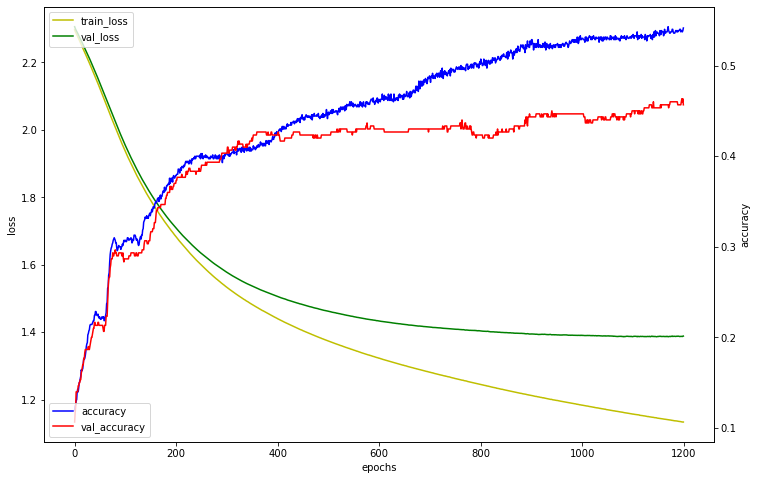

In [45]:
fig, loss_ax = plt.subplots(figsize=(12,8))
loss_ax.plot(hist.history['loss'],'y',label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val_loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')

acc_ax =loss_ax.twinx() #x축을 공유하는 acc_ax와 loss_ax
acc_ax.plot(hist.history['accuracy'],'b',label='accuracy')
acc_ax.plot(hist.history['val_accuracy'],'r',label='val_accuracy')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

In [30]:
# 모델 평가하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=100)

100/100 [==============================] - 0s 709us/step - loss: 1.5533 - accuracy: 0.5286


In [31]:
print('loss : ', loss_and_metrics[0])
print('accuracy : ', loss_and_metrics[1])


loss :  1.5532864332199097
accuracy :  0.5285999774932861


In [32]:
# 6. 모델 저장 및 로드하기
model.save('model/mnist.h5')

In [34]:
from tensorflow.keras.models import load_model
model12 = load_model('model/mnist.h5')
model12.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 1570      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                30        
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


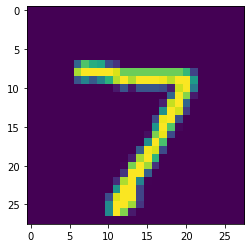

In [36]:
plt.imshow(X_test[0].reshape(28,28))

In [37]:
# 6. 모델 사용하기
Y_test[0].argmax()

7

In [43]:
result = model12.predict(X_test[10].reshape(1,784))
print('예측치 :', result.argmax())
print('실제값 :', Y_test[10].argmax())

예측치 : 6
실제값 : 0


# ※ 콜백함수1

In [50]:
import tensorflow as tf
class CustomeHistory(tf.keras.callbacks.Callback): # on_epoch_end()
    def __init__(self):
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}):
        self.epoch += 1
        if self.epoch % 50 == 0:
            print("epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}".\
                 format(self.epoch, logs.get('loss'),
                       logs.get('accuracy'),
                       logs.get('val_loss'),
                       logs.get('val_accuracy') ) )

# 1. 데이터 셋 준비하기
(X_train, Y_train),(X_test, Y_test)=mnist.load_data()
# 훈련셋(6만개)에서 훈련셋(5만개)과 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# 정수 -> 실수형 변환 -> normalize하기(255.0으로 나눠)
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val   = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test  = X_test.reshape(10000, 784).astype('float32') / 255.0
# 훈련셋과 검증셋 -> 700개, 300개씩 가져옴(random하게)
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs   = np.random.choice(10000, 300)
X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]
# 원핫인코딩 = 라벨링전환
Y_train = utils.to_categorical(Y_train, 10)
Y_val   = utils.to_categorical(Y_val, 10)
Y_test  = utils.to_categorical(Y_test, 10)

# 2. 모델 구성하기
# from tensorflow.keras.layers import Activation
# relu = Activation('relu')
model = Sequential()
model.add(Dense(units=2, input_dim=784, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])


# 4. 모델 학습시키기
customeHistory = CustomeHistory()
hist = model.fit(X_train, Y_train, epochs=1200, batch_size=100,
                validation_data=(X_val, Y_val),
                callbacks=[customeHistory], verbose=0)


epoch:50, loss:2.0564098358154297, acc:0.23571428656578064, val_loss:2.115929365158081, val_acc:0.23333333432674408
epoch:100, loss:1.826570987701416, acc:0.35857143998146057, val_loss:1.928029179573059, val_acc:0.3100000023841858
epoch:150, loss:1.679067611694336, acc:0.3871428668498993, val_loss:1.8121358156204224, val_acc:0.3400000035762787
epoch:200, loss:1.5823755264282227, acc:0.40857142210006714, val_loss:1.7325689792633057, val_acc:0.36000001430511475
epoch:250, loss:1.5130791664123535, acc:0.4242857098579407, val_loss:1.674147605895996, val_acc:0.3766666650772095
epoch:300, loss:1.4589338302612305, acc:0.4457142949104309, val_loss:1.6301188468933105, val_acc:0.3799999952316284
epoch:350, loss:1.4147250652313232, acc:0.45571428537368774, val_loss:1.5958056449890137, val_acc:0.38999998569488525
epoch:400, loss:1.3773374557495117, acc:0.4699999988079071, val_loss:1.5673118829727173, val_acc:0.39666667580604553
epoch:450, loss:1.3444517850875854, acc:0.47428572177886963, val_loss:

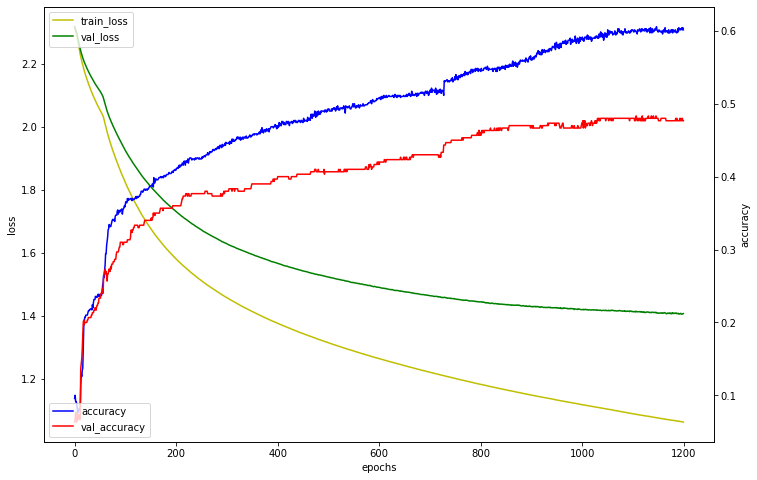

In [51]:
fig, loss_ax = plt.subplots(figsize=(12,8))
loss_ax.plot(hist.history['loss'],'y',label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val_loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')

acc_ax =loss_ax.twinx() #x축을 공유하는 acc_ax와 loss_ax
acc_ax.plot(hist.history['accuracy'],'b',label='accuracy')
acc_ax.plot(hist.history['val_accuracy'],'r',label='val_accuracy')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

# ※ 콜백함수2 - Early Stopping
     * val_loss값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료

In [55]:
# 1. 데이터 셋 준비하기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 훈련셋(6만개)에서 훈련셋(5만개)과 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# 정수 -> 실수형 변환 -> normalize하기(255으로 나눠)
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
# 훈련셋과 검증셋 -> 700개, 300개씩 가져옴(random하게)
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]

X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]
# 원핫인코딩 = 라벨링 전환
Y_train = utils.to_categorical(Y_train, 10)
Y_val = utils.to_categorical(Y_val, 10)
Y_test = utils.to_categorical(Y_test, 10)

# 2. 모델 구성하기
#import tensorflow.keras.layers import Activation
#relue = Activation('relu')
model = Sequential()
model.add(Dense(units=2, input_dim=784, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 학습과정 서정
model.compile(loss ='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
from tensorflow.keras.callbacks import EarlyStopping
earlyStopping = EarlyStopping(patience=30) #성급한 조기종료

hist = model.fit(X_train, Y_train, epochs=3000, batch_size=100, validation_data=(X_val, Y_val), callbacks=[earlyStopping])


Epoch 1/3000
7/7 [==============================] - 0s 17ms/step - loss: 2.2915 - accuracy: 0.1129 - val_loss: 2.2938 - val_accuracy: 0.0967
Epoch 2/3000
7/7 [==============================] - 0s 4ms/step - loss: 2.2866 - accuracy: 0.1129 - val_loss: 2.2912 - val_accuracy: 0.1000
Epoch 3/3000
7/7 [==============================] - 0s 3ms/step - loss: 2.2820 - accuracy: 0.1086 - val_loss: 2.2888 - val_accuracy: 0.1000
Epoch 4/3000
7/7 [==============================] - 0s 4ms/step - loss: 2.2774 - accuracy: 0.1071 - val_loss: 2.2866 - val_accuracy: 0.0967
Epoch 5/3000
7/7 [==============================] - 0s 4ms/step - loss: 2.2734 - accuracy: 0.1086 - val_loss: 2.2842 - val_accuracy: 0.1000
Epoch 6/3000
7/7 [==============================] - 0s 3ms/step - loss: 2.2697 - accuracy: 0.1057 - val_loss: 2.2820 - val_accuracy: 0.1100
Epoch 7/3000
7/7 [==============================] - 0s 4ms/step - loss: 2.2659 - accuracy: 0.1029 - val_loss: 2.2799 - val_accuracy: 0.1000
Epoch 8/3000
7/7 [=

Epoch 116/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.8574 - accuracy: 0.2857 - val_loss: 1.9085 - val_accuracy: 0.2867
Epoch 117/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.8545 - accuracy: 0.2857 - val_loss: 1.9059 - val_accuracy: 0.2900
Epoch 118/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.8518 - accuracy: 0.2871 - val_loss: 1.9035 - val_accuracy: 0.2900
Epoch 119/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.8492 - accuracy: 0.2886 - val_loss: 1.9011 - val_accuracy: 0.2900
Epoch 120/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.8466 - accuracy: 0.2886 - val_loss: 1.8987 - val_accuracy: 0.2900
Epoch 121/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.8440 - accuracy: 0.2886 - val_loss: 1.8959 - val_accuracy: 0.2933
Epoch 122/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.8414 - accuracy: 0.2957 - val_loss: 1.8939 - val_accuracy: 0.2933
Epoch 

7/7 [==============================] - 0s 3ms/step - loss: 1.6401 - accuracy: 0.3714 - val_loss: 1.7289 - val_accuracy: 0.3300
Epoch 230/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.6386 - accuracy: 0.3671 - val_loss: 1.7277 - val_accuracy: 0.3233
Epoch 231/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.6374 - accuracy: 0.3671 - val_loss: 1.7266 - val_accuracy: 0.3300
Epoch 232/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.6360 - accuracy: 0.3686 - val_loss: 1.7257 - val_accuracy: 0.3300
Epoch 233/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.6345 - accuracy: 0.3743 - val_loss: 1.7240 - val_accuracy: 0.3267
Epoch 234/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.6332 - accuracy: 0.3886 - val_loss: 1.7228 - val_accuracy: 0.3300
Epoch 235/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.6316 - accuracy: 0.3829 - val_loss: 1.7221 - val_accuracy: 0.3367
Epoch 236/3000
7/7 [=

7/7 [==============================] - 0s 3ms/step - loss: 1.5018 - accuracy: 0.4357 - val_loss: 1.6275 - val_accuracy: 0.3967
Epoch 344/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.5005 - accuracy: 0.4329 - val_loss: 1.6269 - val_accuracy: 0.3933
Epoch 345/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.4995 - accuracy: 0.4386 - val_loss: 1.6255 - val_accuracy: 0.3967
Epoch 346/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.4985 - accuracy: 0.4386 - val_loss: 1.6251 - val_accuracy: 0.3967
Epoch 347/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.4976 - accuracy: 0.4371 - val_loss: 1.6241 - val_accuracy: 0.4000
Epoch 348/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.4968 - accuracy: 0.4386 - val_loss: 1.6238 - val_accuracy: 0.3967
Epoch 349/3000
7/7 [==============================] - ETA: 0s - loss: 1.3928 - accuracy: 0.51 - 0s 3ms/step - loss: 1.4959 - accuracy: 0.4371 - val_loss: 1.6230 - 

Epoch 400/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.4488 - accuracy: 0.4400 - val_loss: 1.5896 - val_accuracy: 0.4167
Epoch 401/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.4481 - accuracy: 0.4386 - val_loss: 1.5887 - val_accuracy: 0.4167
Epoch 402/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.4471 - accuracy: 0.4471 - val_loss: 1.5884 - val_accuracy: 0.4167
Epoch 403/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.4463 - accuracy: 0.4429 - val_loss: 1.5877 - val_accuracy: 0.4167
Epoch 404/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.4453 - accuracy: 0.4443 - val_loss: 1.5872 - val_accuracy: 0.4200
Epoch 405/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.4446 - accuracy: 0.4486 - val_loss: 1.5859 - val_accuracy: 0.4167
Epoch 406/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.4437 - accuracy: 0.4457 - val_loss: 1.5850 - val_accuracy: 0.4200
Epoch 

7/7 [==============================] - 0s 3ms/step - loss: 1.4033 - accuracy: 0.4614 - val_loss: 1.5588 - val_accuracy: 0.4267
Epoch 458/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.4030 - accuracy: 0.4629 - val_loss: 1.5589 - val_accuracy: 0.4333
Epoch 459/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.4024 - accuracy: 0.4671 - val_loss: 1.5574 - val_accuracy: 0.4267
Epoch 460/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.4013 - accuracy: 0.4657 - val_loss: 1.5572 - val_accuracy: 0.4267
Epoch 461/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.4007 - accuracy: 0.4629 - val_loss: 1.5568 - val_accuracy: 0.4300
Epoch 462/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.3998 - accuracy: 0.4657 - val_loss: 1.5560 - val_accuracy: 0.4267
Epoch 463/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.3996 - accuracy: 0.4643 - val_loss: 1.5549 - val_accuracy: 0.4300
Epoch 464/3000
7/7 [=

7/7 [==============================] - 0s 3ms/step - loss: 1.3330 - accuracy: 0.4957 - val_loss: 1.5194 - val_accuracy: 0.4533
Epoch 572/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.3326 - accuracy: 0.4957 - val_loss: 1.5191 - val_accuracy: 0.4533
Epoch 573/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.3319 - accuracy: 0.5000 - val_loss: 1.5184 - val_accuracy: 0.4533
Epoch 574/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.3316 - accuracy: 0.4986 - val_loss: 1.5182 - val_accuracy: 0.4533
Epoch 575/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.3308 - accuracy: 0.4986 - val_loss: 1.5182 - val_accuracy: 0.4533
Epoch 576/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.3305 - accuracy: 0.4986 - val_loss: 1.5178 - val_accuracy: 0.4533
Epoch 577/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.3298 - accuracy: 0.5000 - val_loss: 1.5178 - val_accuracy: 0.4533
Epoch 578/3000
7/7 [=

Epoch 685/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.2801 - accuracy: 0.5214 - val_loss: 1.4963 - val_accuracy: 0.4733
Epoch 686/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.2798 - accuracy: 0.5214 - val_loss: 1.4961 - val_accuracy: 0.4733
Epoch 687/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.2792 - accuracy: 0.5214 - val_loss: 1.4957 - val_accuracy: 0.4733
Epoch 688/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.2787 - accuracy: 0.5229 - val_loss: 1.4953 - val_accuracy: 0.4733
Epoch 689/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.2783 - accuracy: 0.5229 - val_loss: 1.4955 - val_accuracy: 0.4733
Epoch 690/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.2780 - accuracy: 0.5229 - val_loss: 1.4956 - val_accuracy: 0.4767
Epoch 691/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.2776 - accuracy: 0.5214 - val_loss: 1.4952 - val_accuracy: 0.4733
Epoch 

Epoch 799/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.2378 - accuracy: 0.5314 - val_loss: 1.4835 - val_accuracy: 0.4700
Epoch 800/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.2372 - accuracy: 0.5329 - val_loss: 1.4841 - val_accuracy: 0.4767
Epoch 801/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.2370 - accuracy: 0.5243 - val_loss: 1.4833 - val_accuracy: 0.4700
Epoch 802/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.2373 - accuracy: 0.5271 - val_loss: 1.4832 - val_accuracy: 0.4700
Epoch 803/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.2362 - accuracy: 0.5286 - val_loss: 1.4825 - val_accuracy: 0.4700
Epoch 804/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.2359 - accuracy: 0.5271 - val_loss: 1.4831 - val_accuracy: 0.4700
Epoch 805/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.2356 - accuracy: 0.5300 - val_loss: 1.4828 - val_accuracy: 0.4700
Epoch 

7/7 [==============================] - 0s 3ms/step - loss: 1.2036 - accuracy: 0.5386 - val_loss: 1.4784 - val_accuracy: 0.4733
Epoch 912/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.2029 - accuracy: 0.5414 - val_loss: 1.4783 - val_accuracy: 0.4767
Epoch 913/3000
7/7 [==============================] - 0s 3ms/step - loss: 1.2027 - accuracy: 0.5429 - val_loss: 1.4781 - val_accuracy: 0.4767
Epoch 914/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.2024 - accuracy: 0.5386 - val_loss: 1.4782 - val_accuracy: 0.4733
Epoch 915/3000
7/7 [==============================] - ETA: 0s - loss: 1.1165 - accuracy: 0.55 - 0s 4ms/step - loss: 1.2023 - accuracy: 0.5414 - val_loss: 1.4783 - val_accuracy: 0.4767
Epoch 916/3000
7/7 [==============================] - 0s 4ms/step - loss: 1.2019 - accuracy: 0.5400 - val_loss: 1.4781 - val_accuracy: 0.4767
Epoch 917/3000
7/7 [==============================] - ETA: 0s - loss: 1.2148 - accuracy: 0.53 - 0s 3ms/step - loss: 1.201

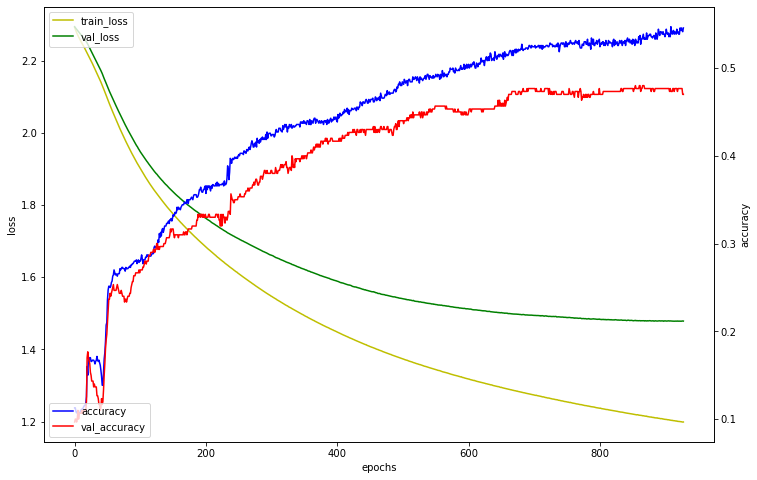

In [56]:
fig, loss_ax = plt.subplots(figsize=(12,8))
loss_ax.plot(hist.history['loss'],'y',label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'g', label='val_loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')

acc_ax =loss_ax.twinx() #x축을 공유하는 acc_ax와 loss_ax
acc_ax.plot(hist.history['accuracy'],'b',label='accuracy')
acc_ax.plot(hist.history['val_accuracy'],'r',label='val_accuracy')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

# 위 모델(DNN)의 accuracy 늘리기
<ul>
    <li> 데이터 확보</li>
    <li> 레이어 </li>
    <li> 활성화 함수 : 은닉층에는 주로 relu, elu, output layer에는 sigmoid(이진분류), softmax(다중분류) </li>
    <li> optimizer, epoch 등을 조정 </li>
    

In [60]:
# 1. 데이터 셋 준비하기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 훈련셋(6만개)에서 훈련셋(5만개)과 검증셋(만개)을 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]
# 정수 -> 실수형 변환 -> normalize하기(255으로 나눠)
X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
# # 훈련셋과 검증셋 -> 700개, 300개씩 가져옴(random하게)
# train_rand_idxs = np.random.choice(50000, 700)
# val_rand_idxs = np.random.choice(10000, 300)

# X_train = X_train[train_rand_idxs]
# Y_train = Y_train[train_rand_idxs]

# X_val = X_val[val_rand_idxs]
# Y_val = Y_val[val_rand_idxs]
# 원핫인코딩 = 라벨링 전환
Y_train = utils.to_categorical(Y_train, 10)
Y_val = utils.to_categorical(Y_val, 10)
Y_test = utils.to_categorical(Y_test, 10)

# 2. 모델 구성하기
#import tensorflow.keras.layers import Activation
#relue = Activation('relu')
model = Sequential()
model.add(Dense(units=1000, input_dim=784, activation='relu'))
model.add(Dense(units=1500, input_dim=1000, activation='elu'))
model.add(Dense(units=2000, input_dim=1500, activation='elu'))
model.add(Dense(units=2500, input_dim=2000, activation='elu'))
model.add(Dense(units=3000, input_dim=2500, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 학습과정 서정
model.compile(loss ='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
from tensorflow.keras.callbacks import EarlyStopping
earlyStopping = EarlyStopping(patience=50) #성급한 조기종료

hist = model.fit(X_train, Y_train, epochs=5000, batch_size=100, validation_data=(X_val, Y_val), callbacks=[earlyStopping])

Epoch 1/5000
500/500 [==============================] - 36s 72ms/step - loss: 0.7497 - accuracy: 0.8316 - val_loss: 0.3222 - val_accuracy: 0.9115
Epoch 2/5000
500/500 [==============================] - 35s 70ms/step - loss: 0.3100 - accuracy: 0.9123 - val_loss: 0.2501 - val_accuracy: 0.9265
Epoch 3/5000
500/500 [==============================] - 35s 71ms/step - loss: 0.2531 - accuracy: 0.9261 - val_loss: 0.2192 - val_accuracy: 0.9384
Epoch 4/5000
500/500 [==============================] - 35s 71ms/step - loss: 0.2177 - accuracy: 0.9366 - val_loss: 0.1881 - val_accuracy: 0.9471
Epoch 5/5000
500/500 [==============================] - 36s 72ms/step - loss: 0.1901 - accuracy: 0.9444 - val_loss: 0.1710 - val_accuracy: 0.9518
Epoch 6/5000
500/500 [==============================] - 36s 72ms/step - loss: 0.1686 - accuracy: 0.9513 - val_loss: 0.1578 - val_accuracy: 0.9564
Epoch 7/5000
500/500 [==============================] - 38s 76ms/step - loss: 0.1501 - accuracy: 0.9567 - val_loss: 0.1466 -

Epoch 57/5000
500/500 [==============================] - 35s 71ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1007 - val_accuracy: 0.9780
Epoch 58/5000
500/500 [==============================] - 35s 71ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1019 - val_accuracy: 0.9788
Epoch 59/5000
500/500 [==============================] - 35s 71ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.1023 - val_accuracy: 0.9792
Epoch 60/5000
500/500 [==============================] - 37s 74ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.1028 - val_accuracy: 0.9786
Epoch 61/5000
500/500 [==============================] - 35s 71ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.1031 - val_accuracy: 0.9784
Epoch 62/5000
500/500 [==============================] - 35s 71ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1032 - val_accuracy: 0.9786
Epoch 63/5000
500/500 [==============================] - 35s 71ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0